# Librairies

In [2]:
import pandas as pd
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
#from geopy.distance import geodesic
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config; set_config(display='diagram')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer


# Données

In [3]:
df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'), 
                   ['full_csv/2016_01.csv', 'full_csv/2016_02.csv', 'full_csv/2016_03.csv','full_csv/2016_04.csv','full_csv/2016_05.csv','full_csv/2016_06.csv','full_csv/2016_07.csv','full_csv/2016_08.csv','full_csv/2016_09.csv','full_csv/2016_10.csv','full_csv/2016_11.csv','full_csv/2016_12.csv']))

/tmp/ipykernel_9215/761339502.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_9215/761339502.py:1: DtypeWarning: Columns (0,1,3,4,10,11,13,19,20,21,22,30,36,41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_9215/761339502.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_9215/761339502.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_9215/761339502.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set

In [8]:
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460944,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460945,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460946,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460947,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analyse Forme

In [14]:
df.shape

(5635978, 65)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5635978 entries, 0 to 460948
Data columns (total 65 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   object 
 1   QUARTER                object 
 2   MONTH                  int64  
 3   DAY_OF_MONTH           object 
 4   DAY_OF_WEEK            object 
 5   FL_DATE                object 
 6   UNIQUE_CARRIER         object 
 7   AIRLINE_ID             int64  
 8   CARRIER                object 
 9   TAIL_NUM               object 
 10  FL_NUM                 object 
 11  ORIGIN_AIRPORT_ID      object 
 12  ORIGIN_AIRPORT_SEQ_ID  int64  
 13  ORIGIN_CITY_MARKET_ID  object 
 14  ORIGIN                 object 
 15  ORIGIN_CITY_NAME       object 
 16  ORIGIN_STATE_ABR       object 
 17  ORIGIN_STATE_FIPS      float64
 18  ORIGIN_STATE_NM        object 
 19  ORIGIN_WAC             object 
 20  DEST_AIRPORT_ID        object 
 21  DEST_AIRPORT_SEQ_ID    object 
 22  DEST_CITY_MARKET_ID

In [10]:
print(df.dtypes)

YEAR                    object
QUARTER                 object
MONTH                    int64
DAY_OF_MONTH            object
DAY_OF_WEEK             object
                        ...   
LATE_AIRCRAFT_DELAY    float64
FIRST_DEP_TIME         float64
TOTAL_ADD_GTIME        float64
LONGEST_ADD_GTIME      float64
Unnamed: 64            float64
Length: 65, dtype: object


In [5]:
df.describe(include='all')

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
count,5635978.0,5635978.0,5.635978e+06,5635978.0,5635978.0,5635978,5635978,5.635978e+06,5635978,5623228,...,5.635973e+06,968440.000000,968440.000000,968440.000000,968440.000000,968440.000000,34533.000000,34533.000000,34533.000000,0.0
unique,3.0,7.0,NaN,63.0,15.0,367,13,NaN,13,5036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016.0,1.0,NaN,22.0,5.0,2016-03-25,WN,NaN,WN,N491HA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5627786.0,1460821.0,NaN,190233.0,843869.0,21367,1296854,NaN,1296854,3937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.510400e+00,NaN,NaN,NaN,NaN,1.990272e+04,NaN,NaN,...,3.864900e+00,20.301263,2.709674,14.697945,0.085111,24.339327,1328.282252,35.485072,34.968407,NaN
std,NaN,NaN,9.231540e+00,NaN,NaN,NaN,NaN,5.736427e+02,NaN,NaN,...,2.431485e+00,57.451040,21.434164,30.567764,2.426291,45.941604,503.640838,31.122975,30.092505,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,1.939300e+04,NaN,NaN,...,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,3.000000e+00,NaN,NaN,NaN,NaN,1.979000e+04,NaN,NaN,...,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,858.000000,16.000000,16.000000,NaN
50%,NaN,NaN,7.000000e+00,NaN,NaN,NaN,NaN,1.980500e+04,NaN,NaN,...,3.000000e+00,2.000000,0.000000,2.000000,0.000000,2.000000,1348.000000,26.000000,26.000000,NaN
75%,NaN,NaN,9.000000e+00,NaN,NaN,NaN,NaN,2.030400e+04,NaN,NaN,...,5.000000e+00,18.000000,0.000000,19.000000,0.000000,30.000000,1734.000000,43.000000,42.000000,NaN


<AxesSubplot:ylabel='None'>

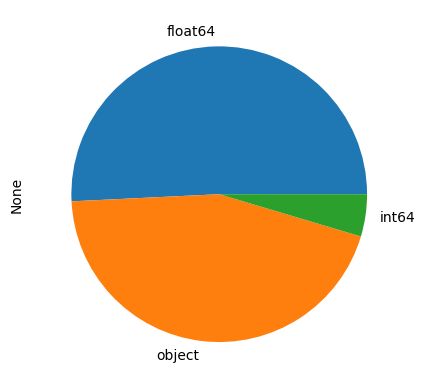

In [11]:
df.dtypes.value_counts().plot.pie()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [12]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

YEAR                 0.000000
CRS_DEP_TIME         0.000000
DEST_WAC             0.000000
DEST_STATE_NM        0.000000
DEST_STATE_FIPS      0.000000
                       ...   
CANCELLATION_CODE    0.988294
LONGEST_ADD_GTIME    0.993873
FIRST_DEP_TIME       0.993873
TOTAL_ADD_GTIME      0.993873
Unnamed: 64          1.000000
Length: 65, dtype: float64

In [13]:
shit = df.isna().sum()
print(shit.to_string())

YEAR                           0
QUARTER                        0
MONTH                          0
DAY_OF_MONTH                   0
DAY_OF_WEEK                    0
FL_DATE                        0
UNIQUE_CARRIER                 0
AIRLINE_ID                     0
CARRIER                        0
TAIL_NUM                   12750
FL_NUM                         0
ORIGIN_AIRPORT_ID              0
ORIGIN_AIRPORT_SEQ_ID          0
ORIGIN_CITY_MARKET_ID          0
ORIGIN                         0
ORIGIN_CITY_NAME               0
ORIGIN_STATE_ABR               0
ORIGIN_STATE_FIPS              0
ORIGIN_STATE_NM                0
ORIGIN_WAC                     0
DEST_AIRPORT_ID                0
DEST_AIRPORT_SEQ_ID            0
DEST_CITY_MARKET_ID            0
DEST                           1
DEST_CITY_NAME                 0
DEST_STATE_ABR                 1
DEST_STATE_FIPS                0
DEST_STATE_NM                  0
DEST_WAC                       0
CRS_DEP_TIME                   0
DEP_TIME  